In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df=pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
#Mean, std, and quartiles of dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
#df=df[['BMI','Sex','AgeCategory','Race','PhysicalHealth','Smoking','Diabetic','HeartDisease']]
#df

In [5]:
#Checking for null values to fill
print("Number of null values:")
df.info()

Number of null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 1

In [6]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
MentalHealth : [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11 13 17 24 19 21 22 23]
Asthma : ['Yes' 'No']
KidneyDisease : ['No' 'Yes']
SkinCancer : ['Yes' 'No']


In [7]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(319795, 18)


     HeartDisease
No          91.44
Yes          8.56


<AxesSubplot:>

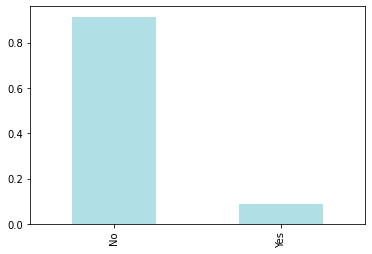

In [8]:
#Percentages and bar chart
print(pd.DataFrame(round((df['HeartDisease'].value_counts()/df.shape[0]*100),2)))
(df['HeartDisease'].value_counts()/df.shape[0]).plot(kind = 'bar', color = 'powderblue')

<AxesSubplot:>

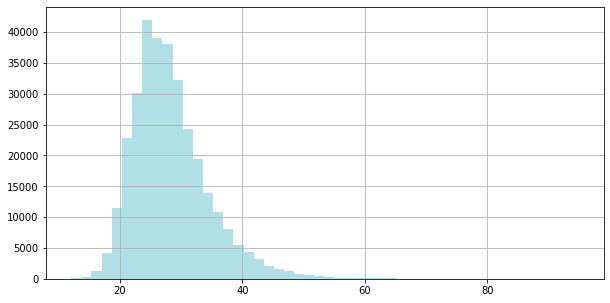

In [9]:
df['BMI'].hist(bins = 50, color = 'powderblue', figsize = (10,5))


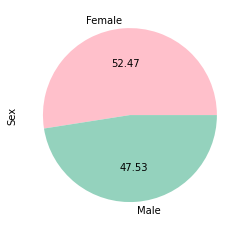

In [10]:
#Distribution of gender by pie-chart
df['Sex'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

In [11]:
#Number of columns that have Yes/No as output
Yes_No_Columns = [column for column in df.columns if (len(df[column].value_counts()) == 2)]
Yes_No_Columns.remove('HeartDisease')
Yes_No_Columns.remove('Sex')
print(Yes_No_Columns)
len(Yes_No_Columns)


['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


8

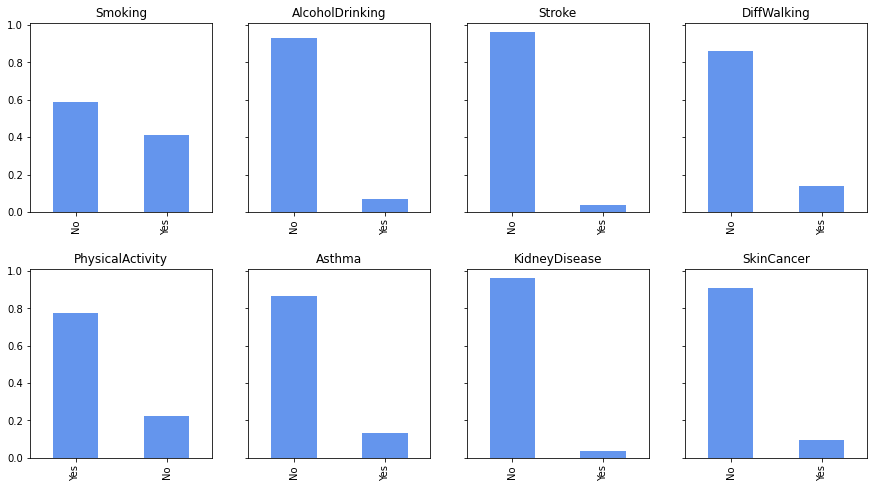

In [12]:
#Plot a barchart for each of these columns
fig, axes = plt.subplots(nrows=2, ncols=4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.3)
for Column in Yes_No_Columns:
    row_n= int((Yes_No_Columns.index(Column) - Yes_No_Columns.index(Column) % 4)/4)
    column_n = Yes_No_Columns.index(Column) % 4
    (df[Column].value_counts()/df.shape[0]).plot(kind = 'bar', ax = axes[row_n,column_n], title = Column, color = 'cornflowerblue')

<AxesSubplot:>

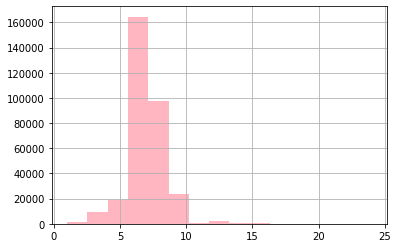

In [13]:
df['SleepTime'].hist(bins = 15, color = 'lightpink')

<AxesSubplot:>

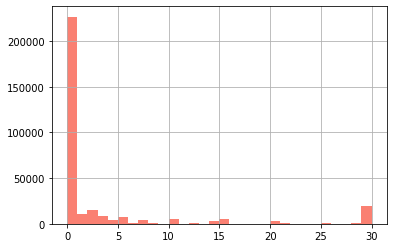

In [14]:
df['PhysicalHealth'].hist(bins = 30, color = 'salmon')

<AxesSubplot:>

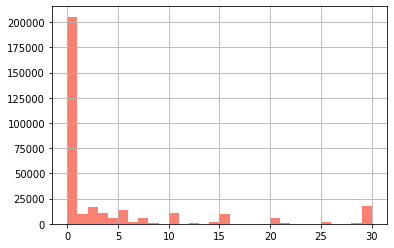

In [15]:
df['MentalHealth'].hist(bins = 30, color = 'salmon')

In [16]:
pd.DataFrame(df['AgeCategory'].value_counts()).style.bar(color='thistle')

,AgeCategory
65-69,34151
60-64,33686
70-74,31065
55-59,29757
50-54,25382
80 or older,24153
45-49,21791
75-79,21482
18-24,21064
40-44,21006


In [17]:
pd.DataFrame(df['Race'].value_counts()).style.bar(color='thistle')

,Race
White,245212
Hispanic,27446
Black,22939
Other,10928
Asian,8068
American Indian/Alaskan Native,5202


In [18]:
pd.DataFrame(df['Diabetic'].value_counts()).style.bar(color='thistle')

,Diabetic
No,269653
Yes,40802
"No, borderline diabetes",6781
Yes (during pregnancy),2559


<AxesSubplot:>

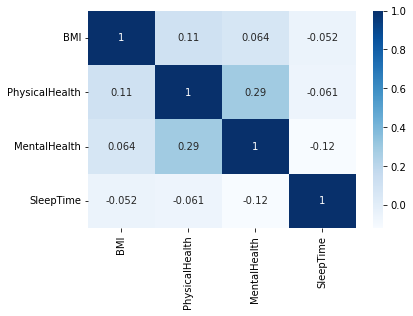

In [19]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [20]:
#Replace categorical with numerical
df['HeartDisease'] = 1 * (df['HeartDisease'] == 'Yes')
pd.DataFrame(df['HeartDisease'].head(5))

,HeartDisease
0,0
1,0
2,0
3,0
4,0


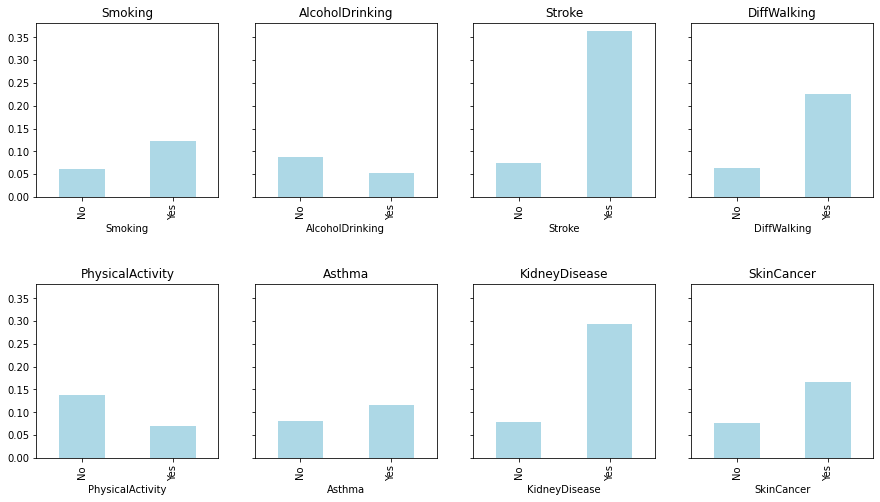

In [21]:
#Heart Disease (Yes) Proportion for each of the Yes/No for each Yes or No Columns
fig, axes = plt.subplots(nrows=2, ncols=4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.5)

for Column in Yes_No_Columns:
    row_n= int((Yes_No_Columns.index(Column) - Yes_No_Columns.index(Column) % 4)/4)
    column_n = Yes_No_Columns.index(Column) % 4
    df.groupby(Column)['HeartDisease'].mean().plot(kind = 'bar', ax = axes[row_n,column_n], title = Column, color = 'lightblue')

<AxesSubplot:xlabel='Sex'>

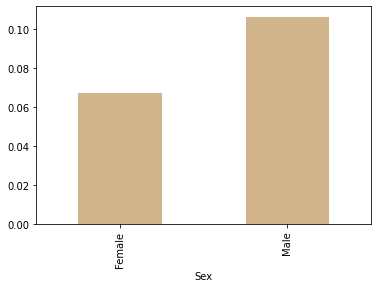

In [22]:
#Heart Disease (Yes) Proportion for each of the Sex values
df.groupby('Sex')['HeartDisease'].mean().plot(kind = 'bar', color = 'tan')

<AxesSubplot:xlabel='AgeCategory'>

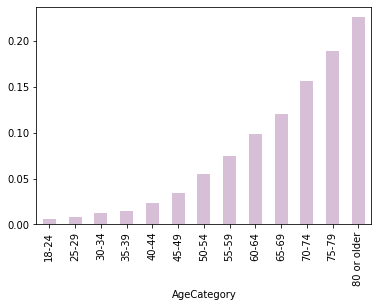

In [23]:
#Heart Disease (Yes) Proportion for each of the AgeCategory values
df.groupby('AgeCategory')['HeartDisease'].mean().plot(kind = 'bar', color = 'thistle')

<AxesSubplot:xlabel='Race'>

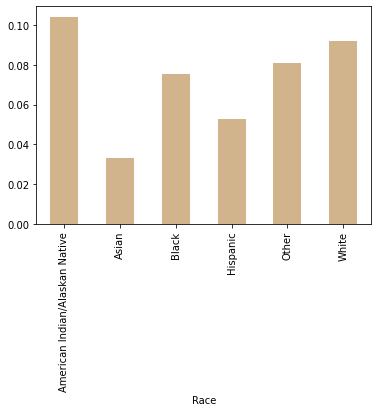

In [24]:
#Heart Disease (Yes) Proportion for each of the Race values
df.groupby('Race')['HeartDisease'].mean().plot(kind = 'bar', color = 'tan')

<AxesSubplot:xlabel='Diabetic'>

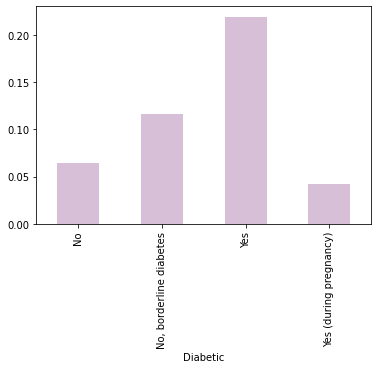

In [25]:
#Heart Disease (Yes) Proportion for each Diabetic values
df.groupby('Diabetic')['HeartDisease'].mean().plot(kind = 'bar', color = 'thistle')

In [26]:
#Assign a status for each BMI range
pd.DataFrame(data = {'Weight Status' :['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity']}, 
             index = ['Below 18.5', '18.5-24.9', '25.0-29.9', '30.0 and Above'])

,Weight Status
Below 18.5,Underweight
18.5-24.9,Healthy Weight
25.0-29.9,Overweight
30.0 and Above,Obsesity


<AxesSubplot:xlabel='BMI_1'>

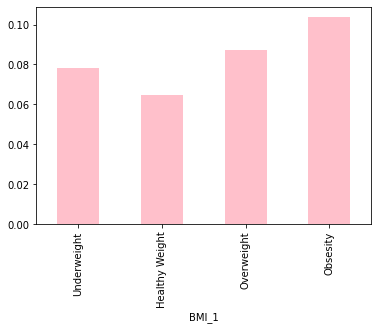

In [27]:
df['BMI_1'] = pd.cut(df['BMI'], [0,18.5,25.0,30.0,100], labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity'], right = False)
df.groupby('BMI_1')['HeartDisease'].mean().plot(kind = 'bar', color = 'pink')

In [28]:
#Ordinal Encoder
from category_encoders import OrdinalEncoder

#Replace categorical data in Sex column
for Column in Yes_No_Columns:
    df[Column] = 1 * (df[Column] == 'Yes')

df['Sex'] = 1 * (df['Sex'] == 'Male')

data=df
#Ordinal columns
data['BMI'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,40,50,100], labels = [0,1,2,3,4,5], right = False)

data['PhysicalHealth'] = pd.cut(data['PhysicalHealth'], [0,1,10,20,30,31],labels = [0,1,2,3,4], right = False)

data['MentalHealth'] = pd.cut(data['MentalHealth'], [0,1,10,20,30,31],labels = [0,1,2,3,4], right = False)

data['SleepTime'] = pd.cut(data['SleepTime'], [1,5,6,10,25], labels =[0,1,2,3] , right = False)

data = data.drop(['PhysicalHealth','MentalHealth','SleepTime','BMI'], axis = 1)

mapping_1 = {}

for category in sorted(list(data['AgeCategory'].unique())):
    mapping_1[category] = sorted(list(data['AgeCategory'].unique())).index(category)

maplist_1 = [{'col': 'AgeCategory', 
            'mapping': mapping_1}]

Ordinal_Encoder_1 = OrdinalEncoder(mapping=maplist_1)

data = Ordinal_Encoder_1.fit_transform(data)

maplist_2 = [{'col': 'GenHealth', 
            'mapping': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}}]

Ordinal_Encoder_2 = OrdinalEncoder(mapping=maplist_2)

data = Ordinal_Encoder_2.fit_transform(data)

In [29]:
#One Hot Encoding
for Race in data['Race'].unique():
    data[Race] = 1 * (data['Race'] == Race)

for Diabetic in data['Diabetic'].unique():
    data[Diabetic] = 1 * (data['Diabetic'] == Diabetic)   
    
data = data.drop(['Race','Diabetic'], axis = 1)
data.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,Asthma,...,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Yes,No,"No, borderline diabetes",Yes (during pregnancy)
0,0,1,0,0,0,0,7,1,3,1,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,12,1,3,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,9,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,11,0,2,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,4,1,3,0,...,1,0,0,0,0,0,0,1,0,0
5,1,1,0,0,1,0,11,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,10,1,1,1,...,1,0,0,0,0,0,0,1,0,0
7,0,1,0,0,1,0,12,0,2,1,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,12,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9,0,0,0,0,1,1,9,1,2,0,...,1,0,0,0,0,0,0,1,0,0
